# CS 109A/AC 209A/STAT 121A Data Science: Homework 1
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Tuesday, September 13th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW1.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid running your notebook on Vocareum and avoid changing your file after submitting.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
print 'done'


#For solution ONLY
import matplotlib.cm as cmx
import matplotlib.colors as colors

done


---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Mieling, Isabelle

### Part (b): Course Number

AC 209a

---

## Problem 1: Basic Data Visualization, Manipulation and Analysis

In this problem, we will be using some basic tools of data visualization and statistical analysis to help build our intuition for finding, describing and interpreting patterns in data. We will be working with the data contained in the file `dataset_HW1.txt`. The data in `dataset_HW1.txt` contains biometric readings for a number of diabetic patients. In this problem, we will try to detect disease subtypes within this set of patients using their biometric readings.

### Part (a): Understanding a Pandas Dataframe
Load the data from `dataset_HW1.txt` into a pandas dataframe. Get a basic picture of the information contained in the dataframe by printing the head, the size of the dataframe, the range of values in numeric-valued columns. Store the max, min and range information as a pandas dataframe.

In [2]:
# read data into pandas df
df = pd.read_csv('dataset_HW1.txt') 
print df.head(n=5)
print 'number of patients: ', df.shape[0]

#compute stats and store them in a dataframe
column_names = df[range(1, 5)].columns.values
stats = pd.DataFrame(columns=column_names)

stats.loc['max'] = df[range(1, 5)].max()
stats.loc['min'] = df[range(1, 5)].min()
stats.loc['range'] = df[range(1, 5)].max() - df[range(1, 5)].min()
stats.head(n=5)

   patient_id   marker_1    marker_2  subtype  patient_age patient_gender
0      619681  21.640523  144.001572      0.0            3         female
1      619711  13.787380  162.408932      0.0           15         female
2      619595  22.675580  130.227221      0.0            6         female
3      619990  13.500884  138.486428      0.0           17           male
4      619157   2.967811  144.105985      0.0            6         female
number of patients:  2300


marker_1    marker_2  subtype  patient_age
max     80.209748  364.221777      3.0         90.0
min    -22.591722  -56.388949      0.0          3.0
range  102.801470  420.610725      3.0         87.0

### Part (b): Descriptive Statistics
Find the mean, median and standard deviation of the real-valued columns in the entire dataset. Now find the same set of descriptive statistics for each of the following subset of data:

1. children (ages 3 - 17)
2. adult males (ages 18 - 90)
3. adult females (ages 18 - 90)

Append these stats to the dataframe from part (a), containing the max, min and range. Explain what these stats say about the entire dataset as well as each of the above subsets.

Give a summary of the demographics of the patients contained in the dataset, i.e. how many children, how many adults, how many adult females and how many adult males. Display these results as pie charts.

In [3]:
more_stats = df.describe()
mean1 = more_stats.loc['mean']
median1 = more_stats.loc['50%']
stdev = more_stats.loc['std']
# 50% is the median  
print mean1
print median1
print stdev

patient_id     621149.808261
marker_1           31.970053
marker_2          105.974247
subtype             1.086957
patient_age        38.868261
Name: mean, dtype: float64
patient_id     621491.500000
marker_1           33.743705
marker_2          105.179291
subtype             1.000000
patient_age        35.000000
Name: 50%, dtype: float64
patient_id     1306.440559
marker_1         18.096490
marker_2         52.306201
subtype           0.928643
patient_age      27.211950
Name: std, dtype: float64


In [4]:
print stats

         marker_1    marker_2  subtype  patient_age
max     80.209748  364.221777      3.0         90.0
min    -22.591722  -56.388949      0.0          3.0
range  102.801470  420.610725      3.0         87.0


In [5]:

children = df[df['patient_age'] < 18]
adult_male = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'male')]
adult_female = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')]

children.describe()

patient_id    marker_1    marker_2     subtype  patient_age
count     800.000000  800.000000  800.000000  800.000000   800.000000
mean   619496.832500   26.267379  121.396907    1.500000    10.106250
std       289.652024   24.972128   23.658433    1.118733     4.307337
min    619000.000000  -22.591722   70.538569    0.000000     3.000000
25%    619244.750000    3.003559  100.247938    0.750000     6.750000
50%    619502.500000   26.868357  121.799063    1.500000    10.000000
75%    619745.250000   49.328335  143.000116    2.250000    14.000000
max    619999.000000   80.209748  171.429357    3.000000    17.000000

In [6]:
adult_female.describe()

patient_id    marker_1    marker_2     subtype  patient_age
count     800.00000  800.000000  800.000000  800.000000   800.000000
mean   622502.17625   44.053269   74.006378    0.500000    54.613750
std       289.08449    7.141580   53.320292    0.500313    21.094034
min    622001.00000   28.364561  -43.386768    0.000000    18.000000
25%    622254.75000   39.225399   30.751708    0.000000    38.000000
50%    622504.00000   43.911490   73.086403    0.500000    56.000000
75%    622752.25000   49.210179  119.656499    1.000000    72.000000
max    622999.00000   59.702106  190.047718    1.000000    90.000000

In [7]:
adult_male.describe()

patient_id    marker_1    marker_2     subtype  patient_age
count     700.000000  700.000000  700.000000  700.000000   700.000000
mean   621493.360000   24.678005  124.883059    1.285714    53.744286
std       289.279677    6.956745   57.523807    0.700355    21.295497
min    621001.000000    1.860516  -56.388949    0.000000    18.000000
25%    621244.750000   19.682346   81.843183    1.000000    35.000000
50%    621491.500000   26.168875  110.893774    1.000000    54.000000
75%    621743.750000   29.883573  164.800374    2.000000    72.000000
max    621999.000000   40.458624  364.221777    2.000000    90.000000

** Explanation ** 

These statistics show that the average age of a patient in the children subgroup is 10 whereas that for the two adult subgroups is about 54. There are 800 patients in the children subgroup and adult female subgroup and 700 patients in the adult male subgroup. The average value for biomarker 1 among the 3 groups varies from 24 in adult males to 26 in children and 44 in adult females. The overall average value for biomarker 1 is 32. The average value for biomarker 2 among the 3 groups valies from 74 in adult females to 125 in adult males and 121 in children. The overall average is 106. There seems to be a difference in mean values for the biomarkers among sex and a difference between children and adult patients. These statistics show a large variance for biomarker 1 and 2 across the entire dataset, with larger variance in biomarker 2 for adults and roughly eqaul large variance in both biomarker 1 and biomarker 2 for children. 

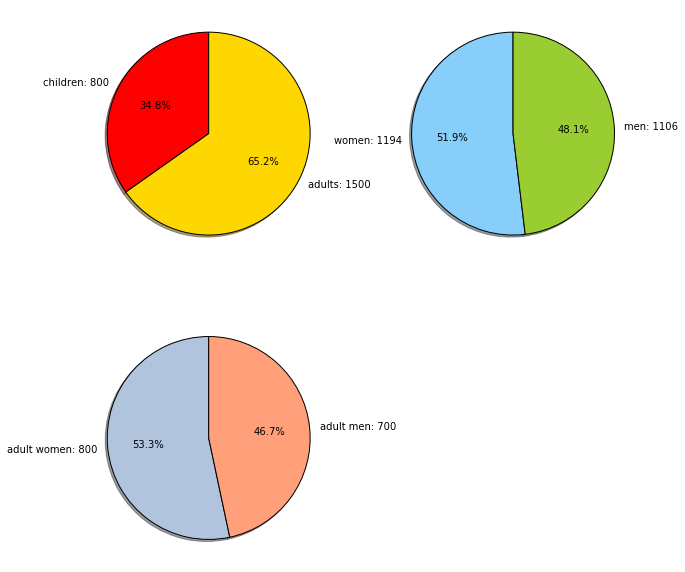

In [8]:
#children vs adults pie chart
children1 = df[df['patient_age'] < 18].shape[0]
adults = df.shape[0] - children1

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
ax1.pie([children1, adults], 
        labels=['children: ' + str(children1), 'adults: ' + str(adults)], 
        colors=['red', 'gold'],
        autopct='%1.1f%%', shadow=True, startangle=90)

#women vs men pie chart
women = df[df['patient_gender'] == 'female'].shape[0]
men = df.shape[0] - women

ax2 = fig.add_subplot(222)
ax2.pie([women, men], 
        labels=['women: ' + str(women), 'men: ' + str(men)], 
        colors=['lightskyblue', 'yellowgreen'],
        autopct='%1.1f%%', shadow=True, startangle=90)

#adult women vs men pie chart
adult_women = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')].shape[0]
adult_men = adults - adult_women

ax3 = fig.add_subplot(223)
ax3.pie([adult_women, adult_men], 
        labels=['adult women: ' + str(adult_women), 'adult men: ' + str(adult_men)], 
        colors=['lightsteelblue', 'lightsalmon'],
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

There are a total of 800 children in this study; 394 are girls and 409 are boys. There are a total of 800 adult women and 700 adult men in the study.

### Part (c): Data Visualization
To understand how the biometric reading might help us determine diabetic subtypes, we begin with some visual analysis of the biometric data:

1. plot histograms of marker 1 and marker 2 (play with different values for the bin number to find the most usefule visualization)
2. plot both markers in a scatter plot, color each point according to disease subtype

Do the above for each demographics within the data: children, adult men and adult women.

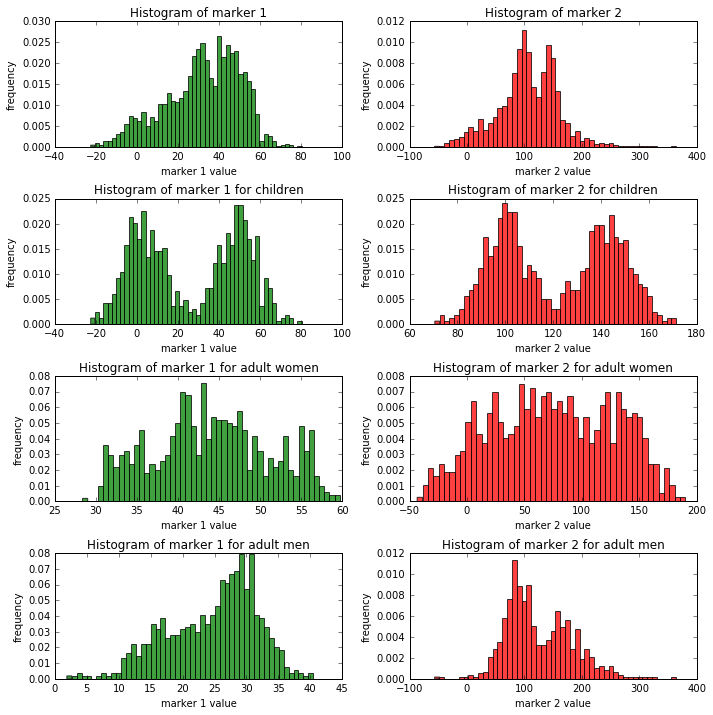

In [9]:
#function for plotting histograms
def plot_hist(data, title, x_lab, face, ax):
    ax.hist(data, 
         50, 
         normed=1, 
         facecolor=face, 
         alpha=0.75)
    ax.set_title(title)
    ax.set_xlabel(x_lab)
    ax.set_ylabel('frequency')
    
    return ax
    
#plot histograms for each marker and each demographics
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(10, 10))
ax1 = plot_hist(df['marker_1'],
                'Histogram of marker 1', 
                'marker 1 value', 
                'green', 
                ax1)

ax2 = plot_hist(df['marker_2'],
                'Histogram of marker 2', 
                'marker 2 value', 
                'red', 
                ax2)

ax3 = plot_hist(df[df['patient_age'] < 18]['marker_1'],
                'Histogram of marker 1 for children', 
                'marker 1 value', 
                'green', 
                ax3)

ax4 = plot_hist(df[df['patient_age'] < 18]['marker_2'],
                'Histogram of marker 2 for children', 
                'marker 2 value', 
                'red', 
                ax4)

ax5 = plot_hist(df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')]['marker_1'],
                'Histogram of marker 1 for adult women', 
                'marker 1 value', 
                'green', 
                ax5)

ax6 = plot_hist(df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')]['marker_2'],
                'Histogram of marker 2 for adult women', 
                'marker 2 value', 
                'red', 
                ax6)

ax7 = plot_hist(df[(df['patient_age'] > 17) & (df['patient_gender'] == 'male')]['marker_1'],
                'Histogram of marker 1 for adult men', 
                'marker 1 value', 
                'green', 
                ax7)

ax8 = plot_hist(df[(df['patient_age'] > 17) & (df['patient_gender'] == 'male')]['marker_2'],
                'Histogram of marker 2 for adult men', 
                'marker 2 value', 
                'red', 
                ax8)

plt.tight_layout()
plt.show()

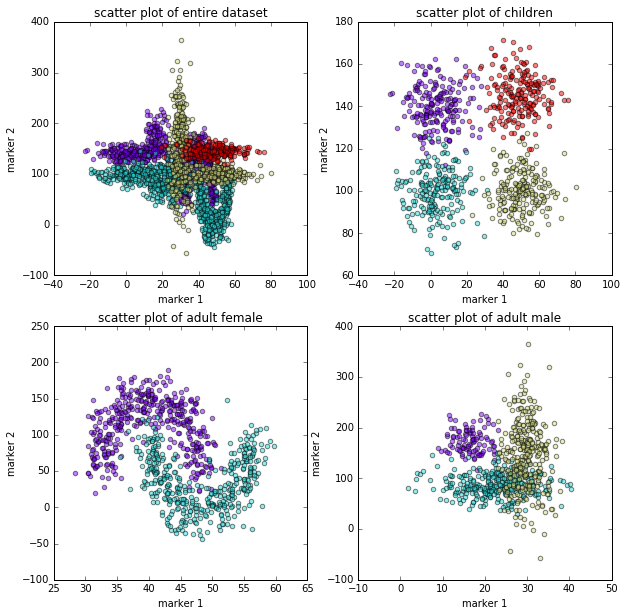

In [10]:
def plot_scatter(data, title, x_lab, y_lab, ax):
    # plot data
    values = np.linspace(0, 1, 4)
    cm = plt.get_cmap('rainbow') 
    cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    
    for k in xrange(4):
        colorVal = scalarMap.to_rgba(values[k])
        ax.scatter(data[data['subtype'] == k]['marker_1'], data[data['subtype'] == k]['marker_2'], c=colorVal, alpha = 0.5)

    ax.set_title(title) 
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
plot_scatter(df, 'scatter plot of entire dataset', 'marker 1', 'marker 2', ax1)  
plot_scatter(df[df['patient_age'] < 18], 'scatter plot of children', 'marker 1', 'marker 2', ax2)  
plot_scatter(df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')], 'scatter plot of adult female', 'marker 1', 'marker 2', ax3)  
plot_scatter(df[(df['patient_age'] > 17) & (df['patient_gender'] == 'male')], 'scatter plot of adult male', 'marker 1', 'marker 2', ax4)  
plt.show()

### Part (d): Putting it All Together

Summarize and interpret the patterns in the **histograms** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric data (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Summarize and interpret the patterns in the **scatter plots** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric readings (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Do your analyses of the patterns in histograms and the scatter plots support or contradict each other? Is one of the two visualizations more useful than the other for anlyzing the relationship between biometric data and disease subtypes? If so which, and why?

Compare the descriptive stats you computed in part (b) with the visualizations. Which aspects of the visualizations (histogram and scatter plots) does each statistic measure? 

Do the stats support, contradict or enhance your visual analysis of the biometric data? 

Finally, what can you conclude, based on your visual analysis and stats, about the relationship between biometric data and diabetic subtypes in this pool of patients?

__ Explanation __ 

**Histograms**
Based on the histograms, the average value for marker 1 in all study participants is around 40, whereas that for marker 2 is around 100. The histogram for marker 1 for all participants has a larger variance than that for marker 2. The histogram for marker 1 is slightly left-skewed whereas that for marker 2 looks more bimodal. Both histograms for children, however, are clearly bimodal with maximum values around 0 and 50, for marker 1, and 100 and 145 for marker 2. In contrast, the histograms for adult women and adult men are less clear with those for adult women having very large variance and no clear maximums and those for adult men being left and right skewed, respectively. Overall, the contrast between these three subgroups is clear: the histograms for biomarkers for children are bimodal and those for adult men and adult women are unimodal, though that for marker 2 for adult men is bimodal. What this indicates is that the relationship between biometric data and subtyps of diabetes may be more useful in children than in adults, as there is a more clear trend in children when compared to in adults. 

**Scatter Plots**
In the scatterplot of the entire dataset, it is unclear where trends may or may not lie with regards to marker 1 and marker 2 as the data is quite messy and centered all in one place. The scatter plot for children has 4 clear subgroups representing the 4 subtypes. This graph is useful in distinguishing a patient's subtype purely by looking at marker 1 and marker 2. In contrast, the scatter plot for adult females only displays 2 subtypes. However, there does seem to be a clear difference between the 2 and a linear model could be used to interpret this relationship. The scatter plot for adult men is also unclear and the points are dispersed throughout the graph. The data points overlap and do not indicate any linear relationships. This scatter plot should not be used to identify a patient's subtype based on his/her marker 1 and marker 2. These 4 scatterplots indicate that there is a clear and strong relationship between biomarker values and subtype for children but no clear relationship between biomarker values and subtype for adult men. It is unclear whether there is a strong relationship between biomarker values and subtype for women but there does seem to be a trend in the scatterplot.

These analyses support my claim that there is a strong relationship between biomarker values and subtype for children but no clear relationship between biomarker values and subtype for adult men and women. In both the histograms and scatter plot, 4 subtypes can be clearly distinguished for children. In adult men, there is no clear relationship in either the scatterplots or histograms and this is consistent. For adult women, there is a trend in the scatterplots which is not as clear in the histograms, since there was no clear trend in the histograms due to noise and large variation. Overall, the scatterplots should be used to analyze the relationship between biometric data and disease subtypes because it is easier to see individual points and the trend is very clear for both children and adult women. The modes in the histograms can show where the data is concentrated but it cannot tell which subtype these are associated with.   

The statistics do not support the patterns we see in the scatterplots as the histograms give specific means for marker 1 and 2, which are not seen as clearly in the plots. 

Given this analysis, we can conclude that there is no clear relationship between biometric data and diabetic subtype in a general pool of patients. As stated above, there is a clear relationship for children but a not-so-clear relationship for adult patients. Therefore, there is no overall relationship that could be modeled to determine the subtype purely from the biometric data. More research needs to be done to determine other confounders for diabetes. 


## Problem 2: Introduction to Classification

In this problem, we will use your analysis of the relationship between biometric data and diabetic subtypes from Problem 1 to **classify** the disease subtype of new patients.

### Part (a): A Disease Subtype Classifier for Children

In the pool of child patients, compute the mean biometric data (marker 1 and marker 2) for each diabetic subtype. For a new patient between the ages of 3 and 18, we will classify the patient as the subtype whose biometric mean is most ``similar" to the patient's biometric data.

- Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

To evaluate our classifier, we can use it to classify a set of new patients whose disease subtype we already know. We measure the quality of our classifier by compute the percentage of new patients whose disease subtype we correctly classify. 

- Explain why the percentage of correct classification is a reasonable way to evaluate our classifier. What might be some shortcomings or ambiguities of this method of evaluation (**Hint:** think about the effect of the number of patients in each disease subtype, confidence level etc).

In [11]:
# mean marker 1, mean marker2 for each diabetic subtype 
print children["subtype"].describe()
subtypes = []
for val in children["subtype"]:
    if val not in subtypes:
        subtypes.append(val)
    else:
        pass
print
print subtypes
print
type0_values = children[(children['subtype'] == 0.0)]
type1_values = children[(children['subtype'] == 1.0)]
type2_values = children[(children['subtype'] == 2.0)]
type3_values = children[(children['subtype'] == 3.0)]

print "length should be 800 and length is: " + str( len(type0_values) + len(type1_values) + len(type2_values) + len(type3_values))
print
print "Mean Values for Each Subtype"
print
print type0_values.mean() # gives mean values for each column
print
print type1_values.mean()
print
print type2_values.mean()
print
print type3_values.mean()

count    800.000000
mean       1.500000
std        1.118733
min        0.000000
25%        0.750000
50%        1.500000
75%        2.250000
max        3.000000
Name: subtype, dtype: float64

[0.0, 1.0, 2.0, 3.0]

length should be 800 and length is: 800

Mean Values for Each Subtype

patient_id     619488.03500
marker_1            3.27982
marker_2          140.14914
subtype             0.00000
patient_age        10.34000
dtype: float64

patient_id     619491.600000
marker_1            3.325403
marker_2           99.704377
subtype             1.000000
patient_age        10.150000
dtype: float64

patient_id     619506.975000
marker_1           49.942425
marker_2          100.196777
subtype             2.000000
patient_age        10.420000
dtype: float64

patient_id     619500.720000
marker_1           48.521868
marker_2          145.537334
subtype             3.000000
patient_age         9.515000
dtype: float64


** Explanation ** 

This way of classifying diease subtypes of new patients in reasonable because there is a clear relationship between biomarker value2 and subtype for children, as seen in the histograms and scatterplots above. The means for marker 1 and marker 2 vary among subtypes and therefore, it would be beneficial to use a patient's biometric data and compare it to a mean to classify the patient into a subtype. 

The percentage of correct classification is a reasonable way to evaluate our classifier because it will give the probability that we will correctly classify a new patient. In knowing the correct subtype of the patient, we can determine what percent of our patients we incorrectly classify and thus we compute the false positives and false negatives as being the percent that we incorrectly classify. The goal for this classifier would be to make this classifier model so that it could be used to predict the subtypes of future patients whose subtypes we do not already know. The error of our predictions can be reduced if we gather more inforamtion from each subtype and have more known patients in each subtype. 

When you build a model for a classification problem, looking at the accuracy means looking at the number of correct predictions out of all the predictions made. However, classification accuracy is not enough informations to make the decision about whether or not the model is good enough to solve the problem. There are many other errors in predictions that need to be looked at in order to determine whether or not it is a good model. 


### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%). 

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and testing data (representing new patients), which then:

    1. computes the biometric means for subtypes using the training data 
    2. classifies the disease subtype of each new patient by comparing their biometric data to the means you've computed (i.e. compute the Euclidean distance between a new patient's biometric data and the biometric means of each disease subtype, classify the new patient as the subtype whose means is most similar in term of the Euclidean distance)


- Write a function, `evaluate`, that takes as input the actual disease subtypes for a set of patients as well as the predicted disease subtypes and computes the percentage of new patients who are correctly classified.

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

*** Notes *** 

Permuting (randomly reordering) a series or the rows in a DataFrame is easy to do using numpy.random.permutation function

Calling permutation with the length of the axis you want to permute produces an array of integers indicating a new ordering

To then select a random subset without replacement, slice off the first k elements of the array returned by the permutation 

In [12]:
seventy_percent = int(len(children)*(.7)) # training, 560

sampler = np.random.permutation(len(children)) #(num) = number of rows you want to reorder
mixed_children = children.take(sampler) # this mixes all the rows in the df

training = mixed_children[:seventy_percent]
testing = mixed_children[seventy_percent:]

test_train = mixed_children[:20]
test_test = mixed_children[20:50]

patient_id = test_test[:1]['subtype']
print patient_id
print type(patient_id)

264    1.0
Name: subtype, dtype: float64
<class 'pandas.core.series.Series'>


In [13]:
# function (classify) that takes as input data (training -- used for the means & testing -- new patients) 
# computes biometric means for subtypes using training data
# set up subtype according to training data mean
# classify disease subtype of patient by comparing biometric data with mean
# compute euclidean distance between patient data and mean 
#classify the new patient as the subtype whose means is most similar in term of the Euclidean distance

def classify(training, testing):
    subtypes = []
    testing_classify_dict = {} # (patient id, subtype)
    for val in training["subtype"]:
        if val not in subtypes:
            subtypes.append(val)
        else:
            pass
    biometrics_dict = {} # [subtype : (marker1, marker2)]
    #print subtypes
    for sub in subtypes:
        values = training[(training['subtype'] == sub)]
        marker1 = values['marker_1'].mean()
        marker2 = values['marker_2'].mean()
        biometrics_dict[sub]= (marker1, marker2)
    #print biometrics_dict
    for index, row in testing.iterrows():  # how to access rows in df
        patient_id = row['patient_id']
        marker1p = row['marker_1']
        marker2p = row['marker_2']
        test = np.array([marker1p,marker2p])
        min_euc_dist = 10008
        sub1 = 0
        for sub in subtypes:   
            default = np.array(biometrics_dict[sub])
            euc_dist = np.sqrt(np.sum(((default-test)**2)))
            if euc_dist <= min_euc_dist:
                min_euc_dist = euc_dist
                sub1 = sub
        testing_classify_dict[patient_id] = sub1
    #print testing_classify_dict
    return testing_classify_dict

def evaluate(actual_patient_subtypes,testing_classify_dict ): # both are dictionaries (patient id, subtype)
    total_count = 0
    correct_count = 0
    for key in testing_classify_dict:
        patient_id = key
        subtype_predic = int(testing_classify_dict[patient_id])
        patient_info = actual_patient_subtypes[(actual_patient_subtypes['patient_id'] == patient_id)] 
        subtype = int(patient_info['subtype'])
        if subtype_predic == subtype:  ##
            correct_count += 1
            total_count += 1
        else:
            total_count += 1
    percent_correct = (correct_count/total_count)*100
    return percent_correct
            
guess = classify(training, testing)
evaluate(testing, guess)

#print test_train   
#for index, row in test_train.iterrows():  # how to access rows in df    
 #   print "row"
#  print row
#guess = classify(test_train, test_test)
#print evaluate(test_train, guess)

95.83333333333334

### Part (c): Further Evaluation of Our Classifier

- Create training and testing sets from the adult female patients. Use the `classify` function from Part (b) to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

- Do the same for adult male patients.

- Is our method of classifying disease subtypes valid for adult male and adult female patients (use the returned values of the `evaluate` function to support your explanation)? 

- Explain why our method of classifying disease subtypes is or is not valid for adult data. 

In [14]:
# adults female patients 
seventy_percent = int(len(adult_female)*(.7))
sampler = np.random.permutation(len(adult_female)) #(num) = number of rows you want to reorder
mixed_female = adult_female.take(sampler) # this mixes all the rows in the df

training = mixed_female[:seventy_percent]
testing = mixed_female[seventy_percent:]

guess = classify(training, testing)
print evaluate(testing, guess)

# adults male patients 
seventy_percent = int(len(adult_male)*(.7))
sampler = np.random.permutation(len(adult_male)) #(num) = number of rows you want to reorder
mixed_male = adult_male.take(sampler) # this mixes all the rows in the df

training = mixed_male[:seventy_percent]
testing = mixed_male[seventy_percent:]

guess = classify(training, testing)
print evaluate(testing, guess)

81.6666666667
62.0853080569


## ** Explanation ** 

Our method of classifying disease subtypes is not valid for adult males and adult females, as indicatd by the % accuracy given above. The classification function only gives roughly 82% accuracy for adult females and roughly 60% accuracy for adult males. These percentages are not high enough to be confident in our model. With less than a 61% accuracy for adult males, we cannot be confident that our model will predict the correct subtype as we have shown that 38% of the time, it will give an incorrect subtype. Similarly, adult females risk being misdiagnosed 17% of the time if we use this model. 

Therefore, as shown in our histograms and scatterplots, since there is no well-defined and clear trend or relationship between disease biomarkers and disease subtypes for adult men and adult women, out method for classifying disease subtypes, which is based on a relationship, is not valid for adult men and women. 

## Problem 3: More Classification

In this problem, we will explore a different way to classify the disease subtype of new patients.

### Part (a): Another Classifier

In Problem 2, we classified the disease subtype of a new patient by comparing their biometric data with the biometric means of the subtypes we compute from the training data. This time, we compare the biometric data of the new patient with the data of all the patients in the training data. We identify the patient in the training data whose biometric data is most similar (in terms of Euclidean distance) to that of the new patient. Finally, we classify the disease subtype of the new patient as that of the patient most similar to them.

Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

** Explanation **

This way of classifying disease subtypes of new patients is more reasonable than what we had previously thought of doing. Since there is so much variation within the subtypes for each category, it makes more sense to compare with simiar patients who have already been classified to a specific subtype. 

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%).  

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and data for new patients, which then:

    1. for each new patient, identify the patient in the training set whose biometric data is the most similar to this patient 
    2. classifies the disease subtype of each new patient as the subtype of the patient most similar to them
    

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function, from Problem 2, to evaluate your classification.

- Do the same for adult male and adult female data.

In [15]:
seventy_percent = int(len(children)*(.7)) # training, 560
sampler = np.random.permutation(len(children)) #(num) = number of rows you want to reorder
mixed_children = children.take(sampler) # this mixes all the rows in the df
training_child = mixed_children[:seventy_percent]
testing_child = mixed_children[seventy_percent:]

seventy_percent = int(len(adult_female)*(.7)) # training, 560
sampler = np.random.permutation(len(adult_female)) #(num) = number of rows you want to reorder
mixed_female = adult_female.take(sampler) # this mixes all the rows in the df
training_female = mixed_female[:seventy_percent]
testing_female = mixed_female[seventy_percent:]

seventy_percent = int(len(adult_male)*(.7)) # training, 560
sampler = np.random.permutation(len(adult_male)) #(num) = number of rows you want to reorder
mixed_male = adult_male.take(sampler) # this mixes all the rows in the df
training_male = mixed_male[:seventy_percent]
testing_male = mixed_male[seventy_percent:]

In [16]:
def classify2(training, row): # make this function for 1 row at a time 
    euc_dist = np.sqrt((training['marker_1']-row['marker_1'])**2 + (training['marker_2']-row['marker_2'])**2)
    minimum = euc_dist.argmin() # this returns the "name number" for the person 
    return training.loc[minimum]['subtype']

def classify_data(testing, training):
    subtype_guess = testing.apply(lambda row: classify2(training, row), axis=1) # row by row     
    testing['subtype_guess'] = subtype_guess
    return testing

def evaluate2(table):
    difference = table['subtype'] - table['subtype_guess']
    return 1-(np.count_nonzero(difference)/len(difference))

print 'Children: ', evaluate2(classify_data(testing_child, training_child)) 
print 'Adult Females: ', evaluate2(classify_data(testing_female, training_female)) 
print 'Adult Males: ', evaluate2(classify_data(testing_male, training_male)) 

Children:  0.95
Adult Females: 

/Users/isabelle/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 0.95
Adult Males:  0.848341232227


### Part (c): Comparison of Classifiers

Compare the performance of the classifier you implemented in Part (b) with the one from Problem 2.

Which classifier does a better job on the child patient data? Explain why, using your analysis of the dataset from Problem 1. 

Answer the above question for the adult male and adult female data.

The classifier from Part (b) is different from that in Problem 2 becuase the patient's data is being compared to different values. In problem 2, the average of each of the biomarkers for a specific subtype is calculated using all the data from previous patients. In contrast, the method from Part (b) compared the patient of the new dats to each individual previous patients and finds the best fit for both biomarkers with 1 patients. Based on the percent accuracy of each method calculated, the classifier from Part (b) does a better job. The classifier implemented in Part (b) performs better than the one from Problem 2 becuase it relates the future patients with current patients. It performs better for adule male and adult female patients but the classifier from Problem 2 does better for child data. This makes sense becasue based on the histograms and scatter plots from Problem 1, there is a clear disctinction between each of the subtypes for child data based on biomarker 1 and biomarker 2 values whereas for adult men and women, there is no clear relationships. This indicated that there is more variance among biomarker pairs for one subtype and therefore, using the classifier from Problem 2 would be better.   

---

## Challenge Problem: US Voting Data (by Age and Sex)
**(Required for AC 209A Students)**

In this problem, you will perform preliminary data exploration and visualization of some real voting data. 

**Note:** You are now working with real-life data, so be cautious regarding data type, data format and data quality.

### Part (a): Downloading and Understanding the Data

Download Table 1 from the [US Census Bereau](http://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-577.html). This is an excel file (do not perform any analysis using Microsoft Excel). 

Load the data into a Python data structure.

Write a brief summary describing what information is included in this dataset (provide evidence to support your summary).

In [17]:
census = pd.read_excel('table01.xls', skip_footer = 3 ) 
census.head(5)

Table with row headers in column A and column headers in rows 4 through 6.  \
0  Table 1. Reported Voting and Registration, by ...                           
1                                     (In thousands)                           
2                                        Sex and Age                           
3                                                NaN                           
4                                                NaN                           

         Unnamed: 1                Unnamed: 2           Unnamed: 3 Unnamed: 4  \
0               NaN                       NaN                  NaN        NaN   
1               NaN                       NaN                  NaN        NaN   
2  Total Population                US Citizen                  NaN        NaN   
3               NaN  Total Citizen Population  Reported registered        NaN   
4               NaN                       NaN               Number    Percent   

                Unnamed: 5 Unnamed: 6                     Unnamed: 7  \
0                      NaN        NaN                            NaN   
1                      NaN        NaN                            NaN   
2                      NaN        NaN                            NaN   
3  Reported not registered        NaN  No response to registration 1   
4                   Number    Percent                         Number   

  Unnamed: 8      Unnamed: 9 Unnamed: 10            Unnamed: 11 Unnamed: 12  \
0        NaN             NaN         NaN                    NaN         NaN   
1        NaN             NaN         NaN                    NaN         NaN   
2        NaN             NaN         NaN                    NaN         NaN   
3        NaN  Reported voted         NaN  Reported did not vote         NaN   
4    Percent          Number     Percent                 Number     Percent   

               Unnamed: 13 Unnamed: 14          Unnamed: 15     Unnamed: 16  
0                      NaN         NaN                  NaN             NaN  
1                      NaN         NaN                  NaN             NaN  
2                      NaN         NaN     Total Population             NaN  
3  No response to voting 2         NaN  Reported registered  Reported voted  
4                   Number     Percent              Percent         Percent

In this dataset we see information regarding reported voting and registration in the United States by sex and age in the year 2014. Total populations with a certain age are given and this total population for each age (over age 18) is then subdivided into what percent registered to vote, what percent did not register, what percent voted, what percent did not vote, and so on. This is further subdivided into female and male sections.  

In [18]:
census.iloc[2:5, (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16)]

Table with row headers in column A and column headers in rows 4 through 6.  \
2                                        Sex and Age                           
3                                                NaN                           
4                                                NaN                           

         Unnamed: 1                Unnamed: 2           Unnamed: 3 Unnamed: 4  \
2  Total Population                US Citizen                  NaN        NaN   
3               NaN  Total Citizen Population  Reported registered        NaN   
4               NaN                       NaN               Number    Percent   

                Unnamed: 5 Unnamed: 6                     Unnamed: 7  \
2                      NaN        NaN                            NaN   
3  Reported not registered        NaN  No response to registration 1   
4                   Number    Percent                         Number   

  Unnamed: 8      Unnamed: 9 Unnamed: 10            Unnamed: 11 Unnamed: 12  \
2        NaN             NaN         NaN                    NaN         NaN   
3        NaN  Reported voted         NaN  Reported did not vote         NaN   
4    Percent          Number     Percent                 Number     Percent   

               Unnamed: 13 Unnamed: 14          Unnamed: 15     Unnamed: 16  
2                      NaN         NaN     Total Population             NaN  
3  No response to voting 2         NaN  Reported registered  Reported voted  
4                   Number     Percent              Percent         Percent

In [19]:
census.iloc[8:80, (0)]

8     .Total 18 years and over
9             ..18 to 24 years
10            ..25 to 34 years
11            ..35 to 44 years
12            ..45 to 54 years
13            ..55 to 64 years
14            ..65 to 74 years
15         ..75 years and over
16                         NaN
17                  ..18 years
18                  ..19 years
19                  ..20 years
20                  ..21 years
21                  ..22 years
22                  ..23 years
23                  ..24 years
24                  ..25 years
25                  ..26 years
26                  ..27 years
27                  ..28 years
28                  ..29 years
29                  ..30 years
30                  ..31 years
31                  ..32 years
32                  ..33 years
33                  ..34 years
34                  ..35 years
35                  ..36 years
36                  ..37 years
37                  ..38 years
                ...           
50                  ..51 years
51      

### Part (b): What's the Story?

Perform data exploration and identify as well as describe the major trends in this data set. Use your computations and visualizations effecitively and specifically to support your analysis, hypothesis and conclusions. Your analysis must include relationships between age, sex and reported percentage of voter registration, reported voting.

In [21]:
# Table 1: compares avg % reported regisiterd with avg % reported voted for males, females, total
# reported registered vs. reported voted in all people
regis_voted = census.iloc[17:79, (4,10)] # 18 -79 years old, % registered vs. % voted
print 'total registered, voted ' 
print regis_voted.mean()

# reported registered vs. reported voted among women
Wregis_voted = census.iloc[169:231, (4,10)] # 18 -79 years old, % registered vs. % voted
print Wregis_voted.mean()

# reported registered vs. reported voted among men
Mregis_voted = census.iloc[93:155, (4,10)] # 18 -79 years old, % registered vs. % voted
print Mregis_voted.mean()

report_regis = pd.Series([Wregis_voted.mean()[0], Mregis_voted.mean()[0], regis_voted.mean()[0]], index=['Women', 'Men', 'Total'] )
report_vote = pd.Series([Wregis_voted.mean()[1], Mregis_voted.mean()[1], regis_voted.mean()[1]], index=['Women', 'Men', 'Total'] )
table1 = pd.DataFrame({'% Reported Registered' : report_regis , '% Reported Voted' : report_vote})
table1

total registered, voted 
Unnamed: 4     65.438710
Unnamed: 10    43.367742
dtype: float64
Unnamed: 4     66.838710
Unnamed: 10    44.014516
dtype: float64
Unnamed: 4     63.979032
Unnamed: 10    42.740323
dtype: float64


% Reported Registered  % Reported Voted
Women              66.838710         44.014516
Men                63.979032         42.740323
Total              65.438710         43.367742

From this table, we can determine the average percent of reported registered and reported voted citizens and compare among sexes. Overall, there is a similar average percentage for both of these reported values with women having a slightly higher percentage for both reported registered and reported voted citizens. This table gives the mean values from the population aging from age 18 to above age 85. 


In [33]:
percent_regisiter = census.iloc[17:79, (4)] # 18 -79 years old, % registered 
percent_vote = census.iloc[17:79, (10)] # 18 -79 years old, % voted 
Wpercent_regisiter = census.iloc[169:231, (4)] # 18 -79 years old, % registered 
Wpercent_vote = census.iloc[169:231, (10)] # 18 -79 years old, % voted 
Mpercent_regisiter = census.iloc[93:155, (4)] # 18 -79 years old, % registered 
Mpercent_vote = census.iloc[93:155, (10)] # 18 -79 years old, % voted 

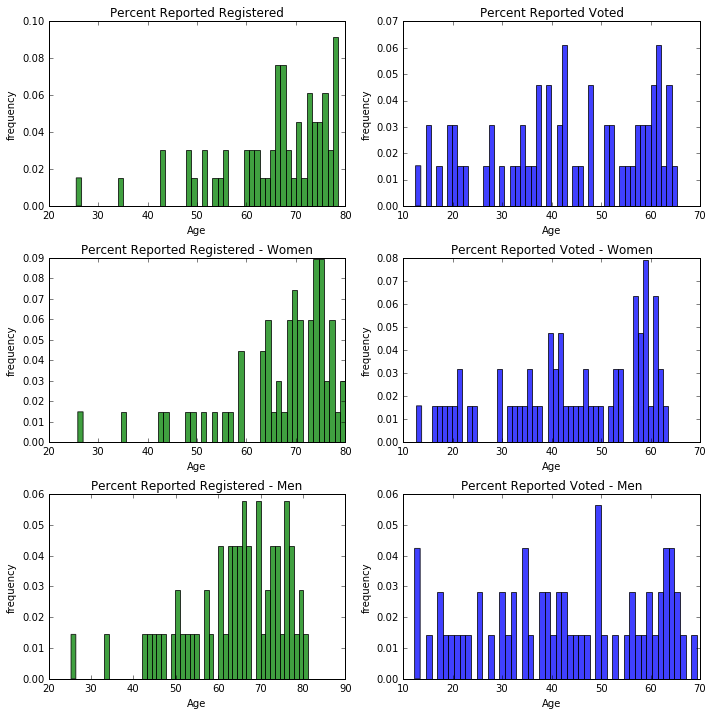

In [36]:
# Scatterplots

#function for plotting histograms
def plot_hist(data, title, x_lab, face, ax):
    ax.hist(data, 
         50, 
         normed=1, 
         facecolor=face, 
         alpha=0.75)
    ax.set_title(title)
    ax.set_xlabel(x_lab)
    ax.set_ylabel('frequency')
    
    return ax
fig, ((ax1,ax2) , (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(10,10))
ax1 = plot_hist(percent_regisiter,'Percent Reported Registered', 'Age', 'green', ax1 )
ax2 = plot_hist(percent_vote,'Percent Reported Voted', 'Age', 'blue', ax2 )
ax3 = plot_hist(Wpercent_regisiter,'Percent Reported Registered - Women', 'Age', 'green', ax3 )
ax4 = plot_hist(Wpercent_vote,'Percent Reported Voted - Women', 'Age', 'blue', ax4 )
ax5 = plot_hist(Mpercent_regisiter,'Percent Reported Registered - Men', 'Age', 'green', ax5 )
ax6 = plot_hist(Mpercent_vote,'Percent Reported Voted - Men', 'Age', 'blue', ax6 )

plt.tight_layout()
plt.show()

From these histograms, we can see a trend overall that percent reporting as registered increases with age among both men and women. However, though the percent who reported having voted increases in women and peaks at age 58, the histogram remains more flat for men, with a smaller peak around age 49. We also notice that the average age at which we see the largest percentage as having reported registered for women is around age 75 whereas that for men is around 70. The histogram for men seems to be shifted to the left for the percent reported registered. This indicated a younger age.

### Part (c): What's Next?

Based on your analysis in part (c), what types of interesting questions or tasks could you ask of or perform with this data (explain your answer)? What additional data do you anticipate needing in order to answer these questions/perform these tasks (explain your answer)?

It would be interesting to see whether a linear trend exists in the data and whether we could model age with percent voting. For this analysis, we can use the analysis given in the table. It would also be interesting and useful to categories the registration and voter turnout/percente by state to see whether there is a trend among states and voter turnout. For this, we would need the registration and voted percentages for each state. 